# graphPlot

Here we model graphs as systems of charged particles, connected by springs, in order to determine "optimal" plotting positions for nodes. We will do a time-step approximation of the movement of the nodes, based on spring and electrostatic forces. We will assume that the graph has no self-loops.

---

##### Table of contents
- [Graph Theory](#Graph-Theory)
- [Intuitive Behavior](#Intuitive-behavior)
- [Moving the Nodes with Newton's 2nd Law](#Moving-the-Nodes-with-Newton's-2nd-Law)
- [Finding the Net Force on a Node](#Finding-the-Net-Force-on-a-Node)
- [The Master Equation](#The-Master-Equation)
- [Examples](#Examples)
    - [SpringBoard Example](#SpringBoard-Example)
    - [Graph-Example](#Graph-Example)
    - [Digraph-Example](#Digraph-Example)
- [Class definitions](#Class-Definitions)

---

### A Motivation In Graph Theory
**Definition 1** Given a set $\mathcal{W}$, a *graph* $G$ is a proper subset of the Cartesian product, $\mathcal{W}\times \mathcal{W}$, such that for any $(A,B)\in G$, it is true that $A\neq B$ and $(B,A)\in G$.

> **Example 2**<br>
Let $\mathcal{W}=\{0,1,2,3\}$. Then $$G=\{(0,1),(1,0),(0,2),(2,0),(1,2),(2,1),(1,3),(3,1)\} \subset \mathcal{W}\times \mathcal{W}$$ is a graph.
Since the standard notation for $G$ is redudent, we will remove every symmetric element:
$$G=\{(0,1),(0,2),(1,2),(1,3)\}.$$

We can have a visual representation of graphs in the plane by drawing labeled vertices and connecting them according to the connections in the graph.

> **Example 2 (continued)**<br>
The graph $G$ can be drawn in the plane as
>
>![](e1.png)
> 
>However, (very frustratingly) $G$ can also be drawn as
> 
>![](e2.png).
>
> which is obviously not ideal.

**Definition 3** A graph is *planar* if it can be plotted in the plane with no intersecting edges.

Note that many planar graphs <u>can</u> be plotted with interesecting edges, and unfortunately, not every graph is planar.

> **Example 4**<br>
The $K_5$ graph is not planar:
>
>![](k5.png)

There are some necessary Planarity Tests:  <!-- https://www.quora.com/Is-there-an-easy-method-to-determine-if-a-graph-is-planar-or-not?share=1 -->
 - Euler's Formula
 - The Four Color Theorem
 - $K_5$ and $K_{3,3}$ as subgraphs

Nothing about a graph definition (a set of tuples) defines how to plot the nodes of a graph, so One question we might consider asking is: ***How can we efficiently plot graphs in a visually satisfactory way?*** If A graph is planar, how can we plot it to reflect that structure? If a graph is not planar, what is the most flattering way we can play the nodes? We will assume that the graph has no self-connecting nodes, since if it does, it will not change how we should place nodes.

### Intuitive Behavior

One intuitive path to take, is to use physicial phenomenon to move the nodes into an optimal place.

Recall some governing force equations that will be useful:
 - Spring Force $$F_s=kx$$
 - Electrostatic Force $$F_e=Q\frac{q_1q_2}{r^2}$$
 - Gravitational Force $$F_g=mg$$

The nodes can be modeled as charged particles, and the connections as springs. In this sense, starting from random positions the nodes will have the freedom to equalize and spread out, but be constrained by the edge connections. As the nodes move around and equlize, the gravitational force can help to ensure that the graph in whole stays in the same place.

So how should we define $q$ and $m$? Intuitively, we want the vertices to be more "free" the less connected they are, and when a node is very connected, we want it to have more inertia. Luckily, there is already convemtional notation for this!

**Definition 5** The *degree* of node $A$ in a graph $G$ is the number of nodes that are connected to $A$, and is notated $\text{deg}(A)$. 


### Moving the Nodes with Newton's 2nd Law

In order to translate forces ot movement, we need Newton's Second Law.

Let $\Delta t$ be the time step of the simulation. For each node $A$, we can use the net force on $A$ to recursively approximate its $j+1^{\text{st}}$ displacement, $\Delta \vec{d}_{j+1}$:

\begin{align*}
         & \sum \vec{F}(A)=m\vec{a}= \operatorname{deg}(A) \frac{d^2}{dt^{2}} \vec{d}\\
\implies & \frac{\sum\vec{F}(A)}{\operatorname{deg}(A)}
           =\frac{d^2}{dt^{2}} \vec{d}\approx \frac{1}{\Delta t^2}\left(\Delta \vec{d}_{j-1}-2\Delta \vec{d}_{j}+\Delta \vec{d}_{j+1}\right)\\
\implies & \Delta \vec{d}_{j+1}\approx \frac{\Delta t^2}{\deg(A)}\sum\vec{F}(A)-\Delta \vec{d}_{j-1}+2\Delta \vec{d}_{j}.
\end{align*}

### Finding the Net Force on a Node

In order to use Newton's Second Law, we need to find $\sum \vec{F}$, the net force on node $A$. 

For each node $A$, define
 - $\mathcal{X}$: the set of nodes in the graph that are not equal to $A$;
 - $\mathcal{Y}$: be the set of nodes connected to $A$.

Then for each $B$ in $\mathcal{X}$, and $C$ in $\mathcal{Y}$,
\begin{align*}
\vec{F}_g(A) & =-g\deg(A)\frac{\vec{A}}{\|A\|},\\
\vec{F}_e(A,B) & =Q\frac{\deg(A)\deg(B)}{\|\vec{AB}\|^2}\frac{\vec{AB}}{\|\vec{AB}\|},\text{ and}\\
\vec{F}_s(A,C) & =k(\ell-\|\vec{AC}\|)\frac{\vec{A C}}{\|\vec{A B}\|},
\end{align*}

where $\ell>0$ is the unstretched spring length; $Q<0$ and $k>0$ are the electric field and spring constants, respectively. Then
$$\sum\vec{F}(A)=\vec{F}_g(A)+\sum_{B\in\mathcal{X}}\vec{F}_e(A,B)+\sum_{C\in \mathcal{Y}}\vec{F}_s(A,C).$$

### The Master Equation

We can now 

\begin{align*}
\sum\vec{F}(A) & = \vec{F}_g(A)+\sum_{B\in\mathcal{X}}\vec{F}_e(A,B)+\sum_{C\in \mathcal{Y}}\vec{F}_s(A,C)\\
 & = -g\deg(A)\frac{\vec{A}}{\|A\|}+\sum_{B\in\mathcal{X}}Q\frac{\deg(A)\deg(B)}{\|\vec{AB}\|^2}\frac{\vec{AB}}{\|\vec{AB}\|}+\sum_{C\in \mathcal{Y}}k(\ell-\|\vec{AC}\|)\frac{\vec{A C}}{\|\vec{A B}\|},\\
\end{align*}

which implies that
$$\Delta \vec{d}_{j+1} \approx \frac{-g\Delta t^2\vec{A}}{\|A\|}
    + \sum_{B\in\mathcal{X}}\left(Q\frac{\Delta t^2\deg(B)}{\|\vec{AB}\|^2}\frac{\vec{AB}}{\|\vec{AB}\|}\right)
    +\sum_{C\in \mathcal{Y}}\left(\frac{k\Delta t^2(\ell-\|\vec{AC}\|)\vec{A C}}{\deg(A)\|\vec{A B}\|}\right)
    -\Delta \vec{d}_{j-1}+2\Delta \vec{d}_{j}.$$


## Examples

Import the graphPlot module into your python environment

In [1]:
from graphPlot import * 

#### `SpringBoard` Example

Define an adjacency dictionary:

In [2]:
A = {1:[2,3], 2:[4,5], 3:[6,7], 4:[], 5:[], 6:[], 7:[]}

Create a SpringBoard object with a field constant `Q` and spring constant `k`:

In [3]:
SB = SpringBoard(A, k = 1, Q = -1)

Use `plot()` to plot the SpringBoard:

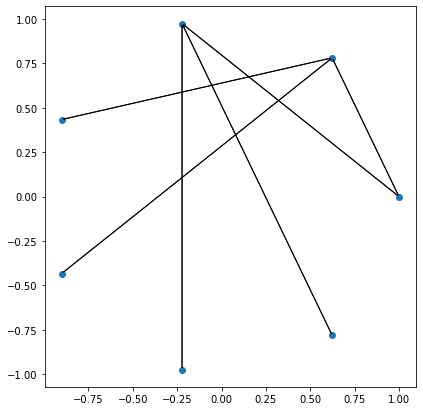

In [4]:
SB.plot()

Use `move()` to simulate the SpringBoard `deltaT` the time step, and `n` the number of timesteps:

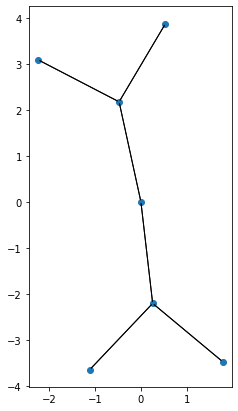

In [5]:
SB.move(0.1, 4000)
SB.plot()

#### `Graph` Example

Define an adjacency matrix:

In [6]:
B = {1:[2,5,4], 2:[1,3], 3:[2,6,4], 4:[1,3], 5:[1,7,8], 6:[7,8,3], 7:[5,6], 8:[5,6]}

Create a `Graph` object:

In [7]:
G = Graph(B)

Plot the Graph using `plot()`:

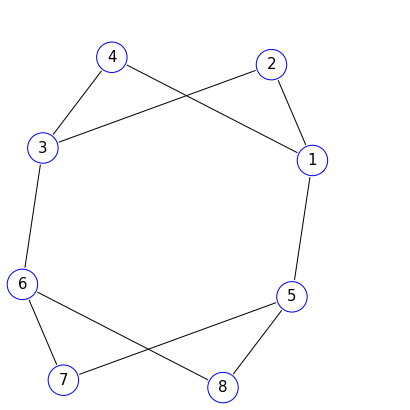

In [8]:
G.plot()

To randomly reset the node position, use `random_reset()`:

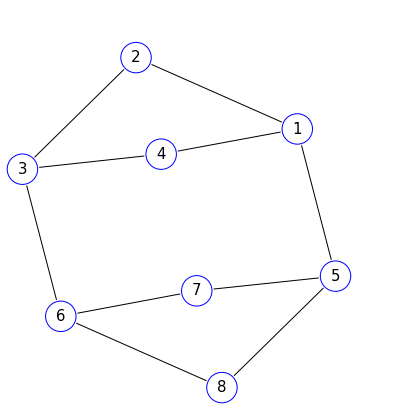

In [15]:
G.random_reset()
G.plot()

Call the `adjacencyMatrix` attribute:

In [17]:
G.adjacencyMatrix

array([[0, 1, 0, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0]])

#### Digraph Example

Define an adjacency dictionary:

In [10]:
C = {1: [3,2], 2: [4], 3: [5,2], 4: [2, 5, 6], 5: [7, 8, 6], 6: [8], 7: [1, 5, 8], 8: [6, 7] , 9:[6], 10:[6], 11: [6]}

In [11]:
D = Graph(C, isDigraph = True)

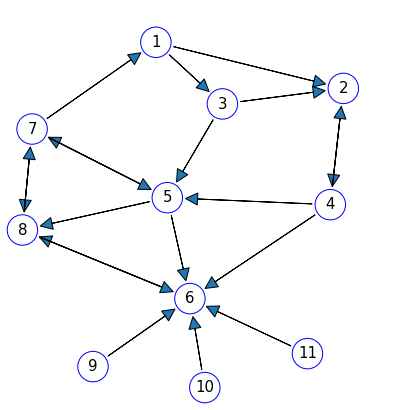

In [12]:
D.plot()

In [13]:
D.adjacencyMatrix

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

## Class Definitions

After importing the graphPlot module, you can use the `help()` command to view the classes defined in `graphPlot.py` and their methods.

In [14]:
help(graphPlot)

Help on module graphPlot.graphPlot in graphPlot:

NAME
    graphPlot.graphPlot

CLASSES
    builtins.object
        Graph
        Node
        SpringBoard
    
    class Graph(builtins.object)
     |  Graph(nodesDict: dict, isDigraph: bool = False)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, nodesDict: dict, isDigraph: bool = False)
     |      Construct Graph object
     |      
     |      Args:
     |          nodesDict - adjacency of first positive integers
     |          isGigraph (bool) - boolean value to declare diGraph type
     |  
     |  force(self, n: int)
     |      Move forward time step simulation
     |      n - number of time steps
     |  
     |  plot(self, saveAs: str = '_')
     |      Plot the Graph
     |      
     |      Args:
     |          saveAs - (optional) a file path to save the plot
     |  
     |  random_reset(self)
     |      Randomly reset node positions and let time step simulation resettle
     |  
     |  -----------